In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
### analisi x KNN

In [52]:
suggested = pd.read_csv('compiled_schedule_suggested.csv')
sample = pd.read_csv('compiled_sample_schedule.csv')
#sample = sample[sample.quality > 69]
perc_quality = [60,65,70,75,80,85,90,95]

In [53]:
suggested.algorithm.unique()

array(['DecisionTree', 'LogisticRegression', 'KNN', 'RandomForest',
       'AdaBoost', 'SVC'], dtype=object)

In [54]:
suggested_completeness = suggested[(suggested.dimension_1 == 'accuracy') & (suggested.algorithm == 'KNN')]
suggested_completeness

,dimension_1,dimension_2,imp_1,imp_2,imp_3,imp_col_1,imp_col_2,imp_col_3,od_1,od_2,...,od_imp_2,od_imp_3,od_imp_col_1,od_imp_col_2,od_imp_col_3,quality,algorithm,perf_dirty,perf_1,perf_2
12,accuracy,completeness,impute_median,impute_median,impute_median,Temperature,Precipitation,AtmosphericPressure,IQR,ZSB,...,impute_median,impute_median,Temperature,Precipitation,AtmosphericPressure,70,KNN,0.653300,0.717150,0.721481
13,accuracy,completeness,impute_median,impute_median,impute_median,Temperature,Precipitation,AtmosphericPressure,IQR,ZSB,...,impute_median,impute_median,Temperature,AtmosphericPressure,Precipitation,70,KNN,0.655213,0.724908,0.715391
14,accuracy,completeness,impute_median,impute_median,impute_median,Temperature,Precipitation,AtmosphericPressure,IQR,ZSB,...,impute_median,impute_median,Precipitation,Temperature,AtmosphericPressure,70,KNN,0.654931,0.721517,0.720514
15,accuracy,completeness,impute_median,impute_median,impute_median,Temperature,Precipitation,AtmosphericPressure,IQR,ZSB,...,impute_median,impute_median,Precipitation,AtmosphericPressure,Temperature,70,KNN,0.648571,0.724926,0.715429
16,accuracy,completeness,impute_median,impute_median,impute_median,Temperature,Precipitation,AtmosphericPressure,IQR,ZSB,...,impute_median,impute_median,AtmosphericPressure,Temperature,Precipitation,70,KNN,0.649740,0.718260,0.723854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1273,accuracy,completeness,impute_median,impute_median,impute_median,AtmosphericPressure,Precipitation,Temperature,IQR,ZSB,...,impute_median,impute_median,Temperature,AtmosphericPressure,Precipitation,95,KNN,0.810242,0.835830,0.835247
1274,accuracy,completeness,impute_median,impute_median,impute_median,AtmosphericPressure,Precipitation,Temperature,IQR,ZSB,...,impute_median,impute_median,Precipitation,Temperature,AtmosphericPressure,95,KNN,0.807464,0.830204,0.832159
1275,accuracy,completeness,impute_median,impute_median,impute_median,AtmosphericPressure,Precipitation,Temperature,IQR,ZSB,...,impute_median,impute_median,Precipitation,AtmosphericPressure,Temperature,95,KNN,0.803792,0.839029,0.834812
1276,accuracy,completeness,impute_median,impute_median,impute_median,AtmosphericPressure,Precipitation,Temperature,IQR,ZSB,...,impute_median,impute_median,AtmosphericPressure,Temperature,Precipitation,95,KNN,0.808206,0.839031,0.834186


In [55]:
suggested = suggested[suggested.algorithm == 'KNN']

In [56]:
sample = sample[['dimension_1', 'dimension_2', 'imp_1', 'imp_2', 'imp_3', 'imp_col_1',
       'imp_col_2', 'imp_col_3', 'od_1', 'od_2', 'od_3', 'od_imp_1',
       'od_imp_2', 'od_imp_3', 'od_imp_col_1', 'od_imp_col_2', 'od_imp_col_3',
       'quality', 'KNN_dirty', 'KNN_1', 'KNN_2']]

In [57]:
original_perf = {
    'DecisionTree': 0.8489316598109451,
    'LogisticRegression': 0.7632625286934418,
    'KNN': 0.8596031818088326,
    'RandomForest': 0.8677511827887843,
    'AdaBoost': 0.8527756267575977,
    'SVC': 0.6896744361694442
}


In [58]:
suggested_completeness = suggested[suggested.dimension_1 == 'completeness']
suggested_accuracy = suggested[suggested.dimension_1 == 'accuracy']
sample_completeness = sample[sample.dimension_1 == 'completeness']
sample_accuracy = sample[sample.dimension_1 == 'accuracy']

In [59]:
def get_median(df, col):
    median = []
    for q in perc_quality:
        median.append(np.median(df[df.quality == q][col]))
    return median

In [60]:
temp_suggested = pd.DataFrame(suggested_accuracy[['quality', 'perf_1','perf_2']])
temp_suggested.columns = ['quality', 'KNN_1','KNN_2']
accuracy_first = pd.concat([temp_suggested, sample_accuracy[['quality', 'KNN_1','KNN_2']]])

/Users/camillasancricca/PycharmProjects/validationDIANA/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10142 (\N{HEAVY TRIANGLE-HEADED RIGHTWARDS ARROW}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


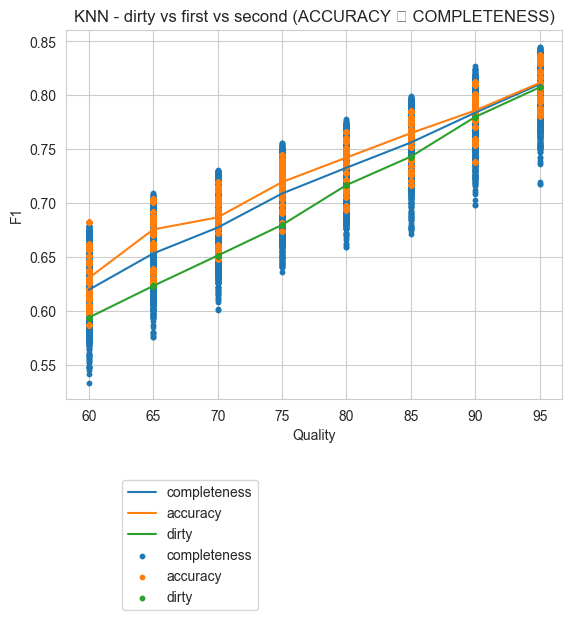

In [61]:
### accuracy --> completeness
plt.plot(perc_quality, get_median(sample_accuracy[['quality', 'KNN_2']], 'KNN_2'), label='completeness')
plt.plot(perc_quality, get_median(sample_accuracy[['quality', 'KNN_1']], 'KNN_1'), label='accuracy')
plt.plot(perc_quality, get_median(sample_accuracy[['quality', 'KNN_dirty']], 'KNN_dirty'), label='dirty')

plt.scatter(sample_accuracy.quality, sample_accuracy.KNN_2, label='completeness', s=10)
plt.scatter(sample_accuracy.quality, sample_accuracy.KNN_1, label='accuracy', s=10)
plt.scatter(sample_accuracy.quality, sample_accuracy.KNN_dirty, label='dirty', s=10)

plt.title("KNN - dirty vs first vs second (ACCURACY ➞ COMPLETENESS)")
plt.xlabel("Quality")
plt.ylabel("F1")
plt.legend(bbox_to_anchor=(0.4, -0.2))
#plt.ylim([0.85,1])
#plt.savefig("/Users/camillasancricca/Desktop/" + "model_1_HC" + ".pdf", bbox_inches='tight')
plt.show()

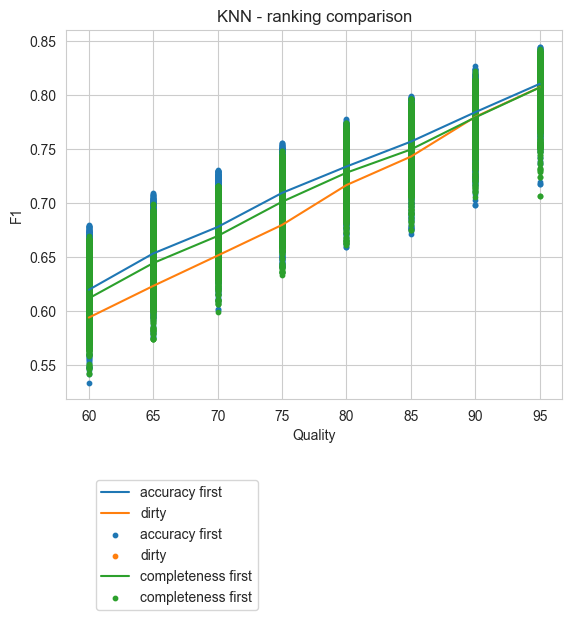

In [62]:
### confronto tra accuracy e completeness nel ranking
plt.plot(perc_quality, get_median(accuracy_first[['quality','KNN_2']],'KNN_2'), label='accuracy first')
plt.plot(perc_quality, get_median(sample_accuracy[['quality','KNN_dirty']],'KNN_dirty'), label='dirty')
plt.scatter(accuracy_first.quality, accuracy_first.KNN_2, label='accuracy first', s=10)
plt.scatter(sample_accuracy.quality, sample_accuracy.KNN_dirty, label='dirty', s=10)
plt.plot(perc_quality, get_median(sample_completeness[['quality','KNN_2']],'KNN_2'), label='completeness first')
plt.scatter(sample_completeness.quality, sample_completeness.KNN_2, label='completeness first', s=10)
plt.title("KNN - ranking comparison")
plt.xlabel("Quality")
plt.ylabel("F1")
plt.legend(bbox_to_anchor=(0.4, -0.2))
#plt.ylim([0.85,1])
#plt.savefig("/Users/camillasancricca/Desktop/" + "model_1_HC" + ".pdf", bbox_inches='tight')
plt.show()

/Users/camillasancricca/PycharmProjects/validationDIANA/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/camillasancricca/PycharmProjects/validationDIANA/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/camillasancricca/PycharmProjects/validationDIANA/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10142 (\N{HEAVY TRIANGLE-HEADED RIGHTWARDS ARROW}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


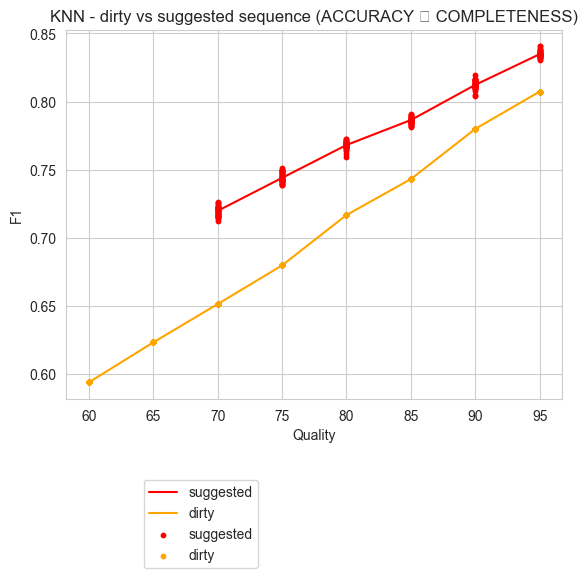

In [63]:
### confronto performance del sample suggested e di quello generale (cosa succede se miglioro nella combinazione di tecniche suggerite vs miglioro tutte le combinazioni)
plt.plot(perc_quality, get_median(suggested_accuracy[['quality','perf_2']],'perf_2'), label='suggested', color = 'red')
plt.plot(perc_quality, get_median(sample_accuracy[['quality','KNN_dirty']],'KNN_dirty'), label='dirty', color = 'orange')
plt.scatter(suggested_accuracy.quality, suggested_accuracy.perf_2, label='suggested', s=10, color = 'red')
plt.scatter(sample_accuracy.quality, sample_accuracy.KNN_dirty, label='dirty', s=10, color = 'orange')
plt.title("KNN - dirty vs suggested sequence (ACCURACY ➞ COMPLETENESS)")
plt.xlabel("Quality")
plt.ylabel("F1")
plt.legend(bbox_to_anchor=(0.4, -0.2))
#plt.ylim([0.85,1])
#plt.savefig("/Users/camillasancricca/Desktop/" + "model_1_HC" + ".pdf", bbox_inches='tight')
plt.show()

/Users/camillasancricca/PycharmProjects/validationDIANA/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/camillasancricca/PycharmProjects/validationDIANA/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/camillasancricca/PycharmProjects/validationDIANA/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10142 (\N{HEAVY TRIANGLE-HEADED RIGHTWARDS ARROW}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


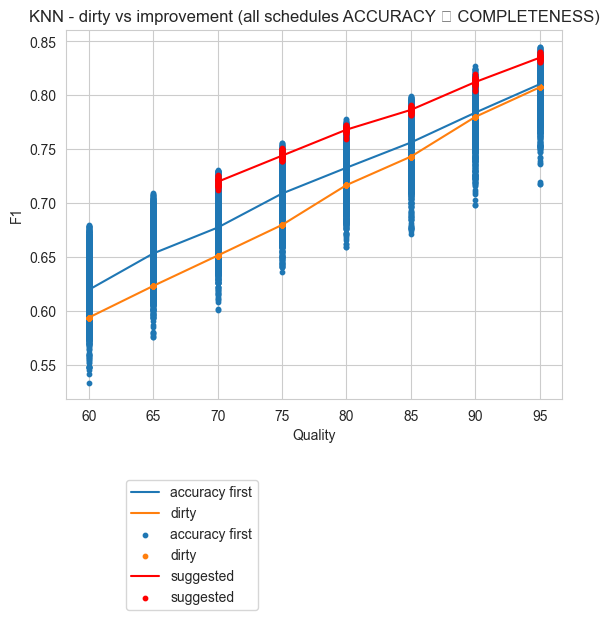

In [64]:
plt.plot(perc_quality, get_median(sample_accuracy[['quality','KNN_2']],'KNN_2'), label='accuracy first')
plt.plot(perc_quality, get_median(sample_accuracy[['quality','KNN_dirty']],'KNN_dirty'), label='dirty')
plt.scatter(sample_accuracy.quality, sample_accuracy.KNN_2, label='accuracy first', s=10)
plt.scatter(sample_accuracy.quality, sample_accuracy.KNN_dirty, label='dirty', s=10)
plt.plot(perc_quality, get_median(suggested_accuracy[['quality','perf_2']],'perf_2'), label='suggested', color = 'red')
plt.scatter(suggested_accuracy.quality, suggested_accuracy.perf_2, label='suggested', s=10, color = 'red')
plt.title("KNN - dirty vs improvement (all schedules ACCURACY ➞ COMPLETENESS)")
plt.xlabel("Quality")
plt.ylabel("F1")
plt.legend(bbox_to_anchor=(0.4, -0.2))
#plt.ylim([0.85,1])
#plt.savefig("/Users/camillasancricca/Desktop/" + "model_1_HC" + ".pdf", bbox_inches='tight')
plt.show()

In [65]:
### analisi di cosa succede step by step (p_dirty, p1, p2) per accuracy e completeness separatamente

In [66]:
### accuracy --> completeness

/Users/camillasancricca/PycharmProjects/validationDIANA/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10142 (\N{HEAVY TRIANGLE-HEADED RIGHTWARDS ARROW}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


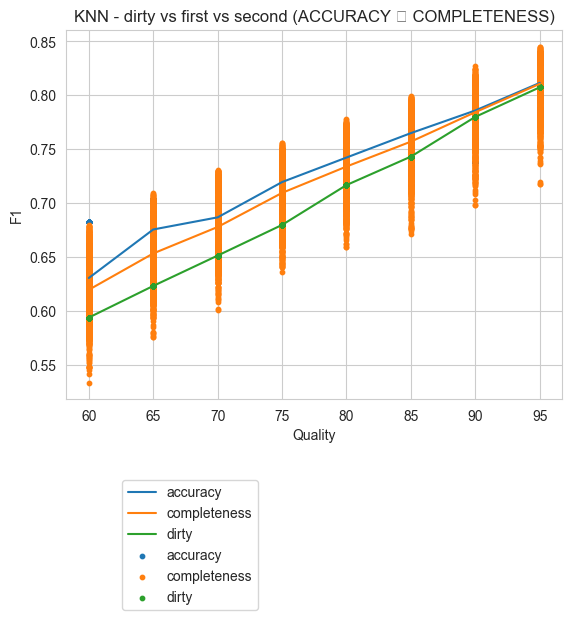

In [67]:
plt.plot(perc_quality, get_median(accuracy_first[['quality','KNN_1']],'KNN_1'), label='accuracy')
plt.plot(perc_quality, get_median(accuracy_first[['quality','KNN_2']],'KNN_2'), label='completeness')
plt.plot(perc_quality, get_median(sample_accuracy[['quality','KNN_dirty']],'KNN_dirty'), label='dirty')

plt.scatter(accuracy_first.quality, accuracy_first.KNN_1, label='accuracy', s=10)
plt.scatter(accuracy_first.quality, accuracy_first.KNN_2, label='completeness', s=10)
plt.scatter(sample_accuracy.quality, sample_accuracy.KNN_dirty, label='dirty', s=10)

plt.title("KNN - dirty vs first vs second (ACCURACY ➞ COMPLETENESS)")
plt.xlabel("Quality")
plt.ylabel("F1")
plt.legend(bbox_to_anchor=(0.4, -0.2))
#plt.ylim([0.85,1])
#plt.savefig("/Users/camillasancricca/Desktop/" + "model_1_HC" + ".pdf", bbox_inches='tight')
plt.show()

/Users/camillasancricca/PycharmProjects/validationDIANA/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10142 (\N{HEAVY TRIANGLE-HEADED RIGHTWARDS ARROW}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


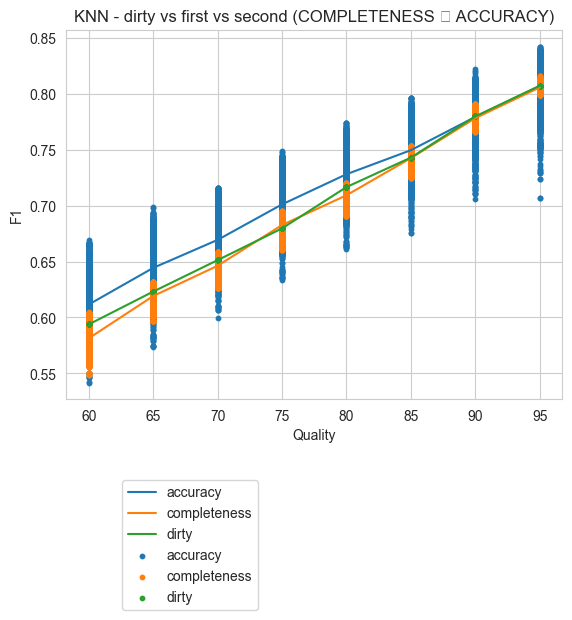

In [68]:
### completeness --> accuracy
plt.plot(perc_quality, get_median(sample_completeness[['quality', 'KNN_2']], 'KNN_2'), label='accuracy')
plt.plot(perc_quality, get_median(sample_completeness[['quality', 'KNN_1']], 'KNN_1'), label='completeness')
plt.plot(perc_quality, get_median(sample_completeness[['quality', 'KNN_dirty']], 'KNN_dirty'), label='dirty')

plt.scatter(sample_completeness.quality, sample_completeness.KNN_2, label='accuracy', s=10)
plt.scatter(sample_completeness.quality, sample_completeness.KNN_1, label='completeness', s=10)
plt.scatter(sample_completeness.quality, sample_completeness.KNN_dirty, label='dirty', s=10)

plt.title("KNN - dirty vs first vs second (COMPLETENESS ➞ ACCURACY)")
plt.xlabel("Quality")
plt.ylabel("F1")
plt.legend(bbox_to_anchor=(0.4, -0.2))
#plt.ylim([0.85,1])
#plt.savefig("/Users/camillasancricca/Desktop/" + "model_1_HC" + ".pdf", bbox_inches='tight')
plt.show()